In [2]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(qvalue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [3]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [4]:
crm1_file = paste0(revision_folder,"Annas_results_all_common_eqtls.csv")
crm1 = read.csv(crm1_file, row.names=1)

In [5]:
crm_file = paste0(revision_folder, "CRM_association_KE/summary.csv")
crm = read.csv(crm_file, row.names=1)

In [6]:
for (chr in 1:22){
    print(c(chr, length(unique(crm[crm$chrom == chr,"gene"])), nrow(crm[crm$chrom == chr,])))
}

[1]      1   1071 897236
[1]      2    726 724029
[1]      3    644 682579
[1]      4    372 414244
[1]      5    495 516933
[1]      6    523 595765
[1]      7    524 531165
[1]      8    385 393530
[1]      9    435 432338
[1]     10    410 433590
[1]     11    601 539645
[1]     12    584 520458
[1]     13    191 209960
[1]     14    345 333461
[1]     15    368 337971
[1]     16    512 445543
[1]     17    646 492841
[1]     18    164 179367
[1]     19    830 672590
[1]     20    280 258036
[1]    21    93 99425
[1]     22    271 262670


In [7]:
nrow(crm)
unique(crm$chr)
length(unique(crm$gene))

[1] 9973376

[1] 11 19 13  1 18  2 14 16  3  6 15  9 20 17  8  7 12 10 22  4  5 21

[1] 10470

In [8]:
crm2 = inner_join(crm, crm1, by=c("snpID","gene","chrom"), suffix=c(".KE",".K"))

In [9]:
cor.test(-log10(crm2$pv_raw.K),-log10(crm2$pv_raw.KE))


	Pearson's product-moment correlation

data:  -log10(crm2$pv_raw.K) and -log10(crm2$pv_raw.KE)
t = 1951.3, df = 5222516, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6488575 0.6498495
sample estimates:
      cor 
0.6493537 


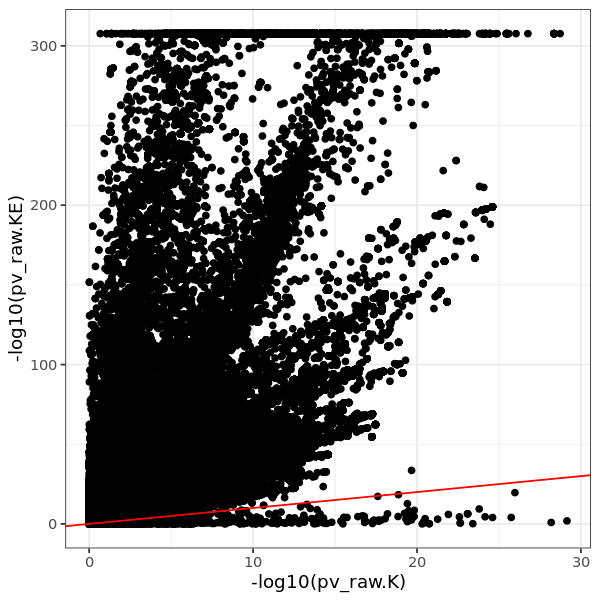

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5) 
ggplot(crm2, aes(x=-log10(pv_raw.K), y=-log10(pv_raw.KE))) + geom_point() + theme_bw() + geom_abline(col="red")

In [11]:
# select top gene (K*E)
crm3 = crm2[order(crm2$pv_raw.KE),]
crm3 = crm3[-which(duplicated(crm3$gene)),]
nrow(crm3)
cor.test(-log10(crm3$pv_raw.K),-log10(crm3$pv_raw.KE))

[1] 10464


	Pearson's product-moment correlation

data:  -log10(crm3$pv_raw.K) and -log10(crm3$pv_raw.KE)
t = 89.419, df = 10462, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6471748 0.6688989
sample estimates:
      cor 
0.6581738 


In [12]:
# select top gene (K)
crm4 = crm2[order(crm2$pv_raw.K),]
crm4 = crm4[-which(duplicated(crm4$gene)),]
nrow(crm4)
cor.test(-log10(crm4$pv_raw.K),-log10(crm4$pv_raw.KE))

[1] 10464


	Pearson's product-moment correlation

data:  -log10(crm4$pv_raw.K) and -log10(crm4$pv_raw.KE)
t = 97.845, df = 10462, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6811153 0.7011289
sample estimates:
      cor 
0.6912546 


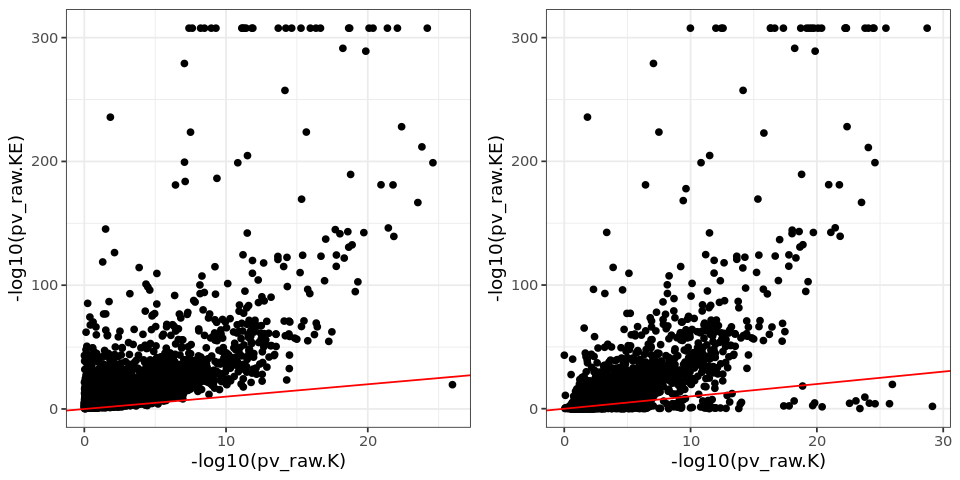

In [13]:
options(repr.plot.width = 8, repr.plot.height = 4) 
p3 = ggplot(crm3, aes(x=-log10(pv_raw.K), y=-log10(pv_raw.KE))) + geom_point() + theme_bw() + geom_abline(col="red")
p4 = ggplot(crm4, aes(x=-log10(pv_raw.K), y=-log10(pv_raw.KE))) + geom_point() + theme_bw() + geom_abline(col="red")
plot_grid(p3,p4,ncol=2)

In [14]:
crm_assoc = crm[crm$chrom %in% c(20,21,22),]

In [15]:
head(crm_assoc)

,gene,n_snps,chrom,pv_raw,snpID,pv
28482,ENSG00000166619,733,20,1.0000000,20_36021916_C_T,1
28483,ENSG00000166619,733,20,0.4758945,20_36022154_T_C,1
28484,ENSG00000166619,733,20,0.3858016,20_36022539_T_C,1
28485,ENSG00000166619,733,20,0.4323076,20_36023803_T_C,1
28486,ENSG00000166619,733,20,0.2495830,20_36024820_T_C,1
28487,ENSG00000166619,733,20,0.6203079,20_36025827_T_C,1


In [16]:
# crm_assoc$fdr = p.adjust(crm_assoc$pv_raw, method = "BH")

In [17]:
res_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/"
all_files = list.files(res_dir)
length(all_files)

[1] 24113

In [18]:
correct_files = list.files(res_dir,"*0.tsv")
length(correct_files)

[1] 24112

In [19]:
all_files[!(all_files %in% correct_files)]

[1] "summary.csv"

In [39]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 245350

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000250479,10,22,0.3439653,22_24071877_G_A
1,ENSG00000250479,10,22,0.4098352,22_24072256_G_C


In [40]:
crm_int_file

[1] "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/summary.csv"

In [41]:
unique(as.character(crm_int$chrom))

[1] "22" "20" "21"

In [42]:
# unique(as.character(crm_int[crm_int$chrom == 20, ]$gene))
length(unique(as.character(crm_int[crm_int$chrom == 20, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 21, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 22, ]$gene)))

[1] 81

[1] 93

[1] 271

In [43]:
length(unique(as.character(crm_int$gene)))

[1] 445

In [44]:
crm_int$fdr = p.adjust(crm_int$pv_raw, method = "BH")

In [45]:
df_join = inner_join(crm_assoc, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))
df_join$fdr_assoc = p.adjust(df_join$pv_raw.assoc, method = "BH")

In [46]:
nrow(df_join)

[1] 245350

In [47]:
thresholds = seq(0, 1, length.out = 100)

In [48]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)

In [49]:
# FDR < 20%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.2,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.2,"gene"]))
}

In [50]:
head(df_plot)

assoc_FDR,n_GxC,n_eGenes
0.00000000,0,0
0.01010101,3796,130
0.02020202,3798,129
0.03030303,3748,131
0.04040404,3774,132
0.05050505,3671,128


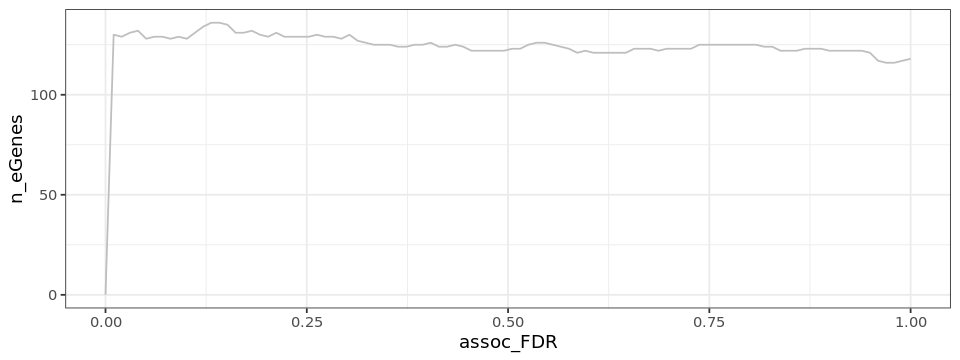

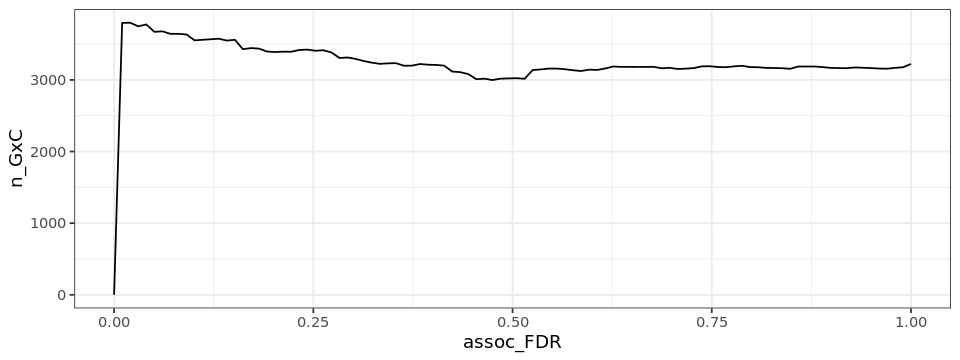

In [51]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [52]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 10%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.1,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.1,"gene"]))
}

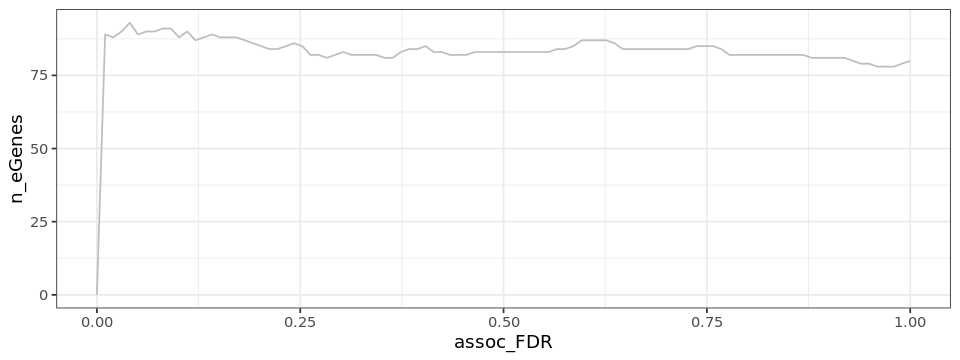

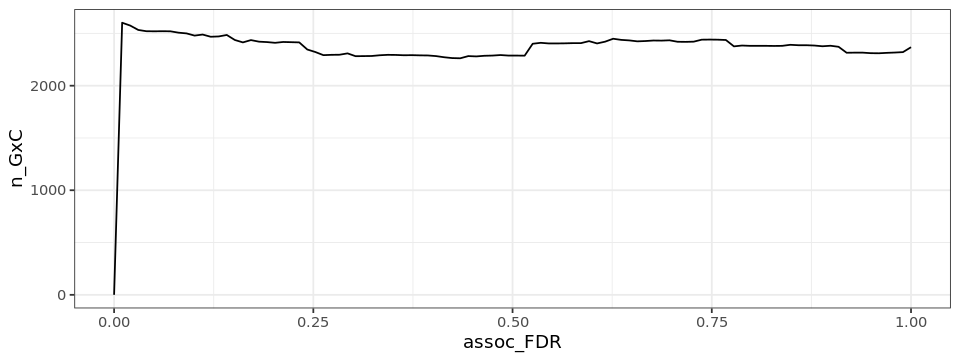

In [53]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [54]:
# FDR < 5%
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.05,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.05,"gene"]))
}

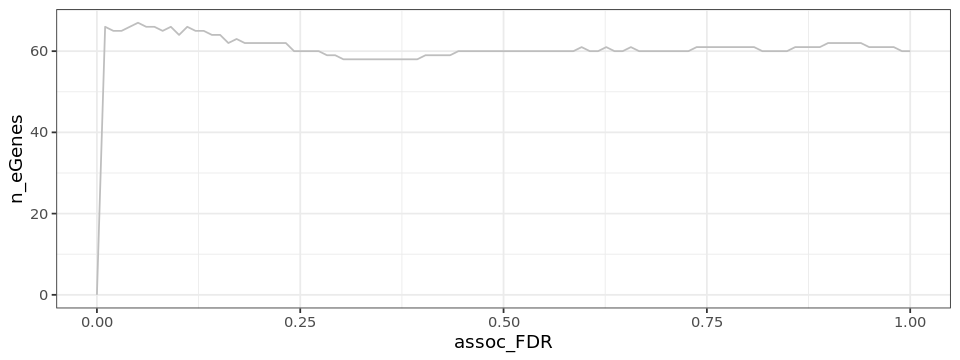

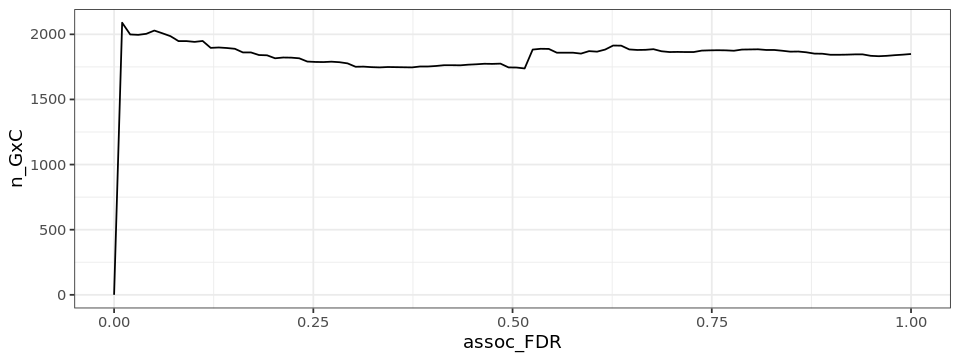

In [55]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [56]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 1%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.01,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.01,"gene"]))
}

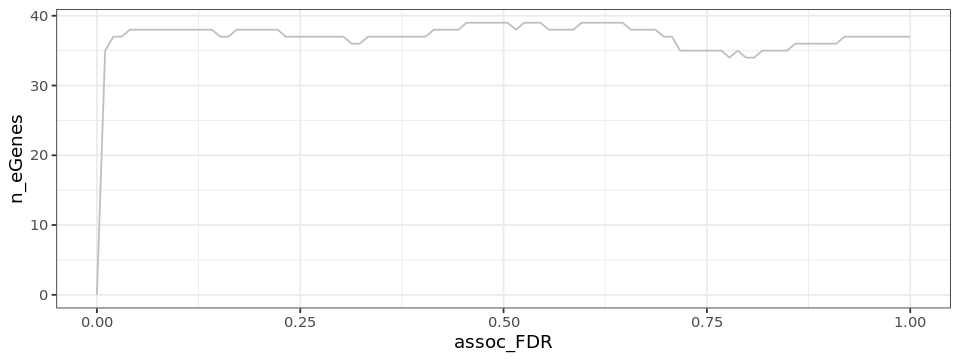

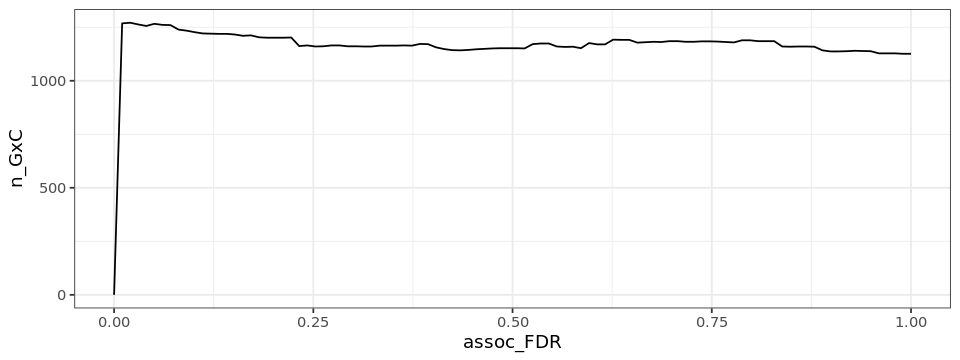

In [57]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()